<a href="https://colab.research.google.com/github/carldegs/EE-286/blob/master/EE286_FinalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Music Genre Classifier

Narz Marbeth David 2005-09925
Carl Justin de Guia 2011-06521

## Introduction
// TODO

In [ ]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

# feature extractoring and preprocessing data
import librosa
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sn
import os
from PIL import Image
import pathlib
import csv

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

#Keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.regularizers import l2

import warnings
warnings.filterwarnings('ignore')

## Dataset

// TODO

In [67]:
# TODO: Import dataset and show graphs and stuff
import hdf5_getters
import numpy as np
import os.path

## Display song
dataset_path = r"C:\Users\dev\Documents\EE286\MillionSongSubset\data"
def get_track_path(trackId, dataset_path):
    track_path = os.path.join(dataset_path, trackId[2],trackId[3], trackId[4]);
    return track_path

def print_track_details(trackId):
    trackPath = get_track_path(trackId, dataset_path)
    filename = os.path.join(trackPath, trackId + ".h5")
    with hdf5_getters.open_h5_file_read(filename) as h5:
        numSongs = hdf5_getters.get_num_songs(h5)
        getters = list(filter(lambda x: x[:4] == 'get_', hdf5_getters.__dict__.keys()))
        getters.remove("get_num_songs") # special case
        for getter in getters:
            res = hdf5_getters.__getattribute__(getter)(h5,0)
            if res.__class__.__name__ == 'ndarray':
                print(getter[4:]+": shape =",res.shape)
            else:
                print(getter[4:]+":",res)
print_track_details("TRBBBEA128F93391BA")                

artist_familiarity: 0.6211210512857237
artist_hotttnesss: 0.4356840702087019
artist_id: b'ARS0W831187B9AF0B7'
artist_mbid: b'256f09e5-43f4-4b3d-836c-2cc9283d22c0'
artist_playmeid: 157463
artist_7digitalid: 32440
artist_latitude: nan
artist_longitude: nan
artist_location: b''
artist_name: b'Maximilian Hecker'
release: b'Help Me'
release_7digitalid: 420564
song_id: b'SOFWWIA12AB01884A1'
song_hotttnesss: 0.2998774882739778
title: b'Sleepy Lad'
track_7digitalid: 4691998
similar_artists: shape = (100,)
artist_terms: shape = (50,)
artist_terms_freq: shape = (50,)
artist_terms_weight: shape = (50,)
analysis_sample_rate: 22050
audio_md5: b'e539d776dec9508fe3d28e6305d0565a'
danceability: 0.0
duration: 174.23628
end_of_fade_in: 6.809
energy: 0.0
key: 7
key_confidence: 0.897
loudness: -14.689
mode: 1
mode_confidence: 0.79
start_of_fade_out: 163.817
tempo: 77.006
time_signature: 4
time_signature_confidence: 0.0
track_id: b'TRBBBEA128F93391BA'
segments_start: shape = (459,)
segments_confidence: sha

In [52]:
## Read the genre mapping table
genre_map = pd.read_csv('msd_tagtraum_cd2c.cls', comment='#', sep='\t', header=None, usecols=[0,1], names=['TrackId', 'Genre'])

def fetchTrackMeta(df) :
    trackPath = get_track_path(df['TrackId'])
    


In [55]:
## Generate Pop training set
pop_data = genre_map[genre_map['Genre'] == 'Pop']
i=0
for index, track in pop_data.iterrows():
    if (i > 3000):
        break
    ## Retrieve track metadata from dataset
    fetchTrackMeta(track)
pop_data.to_csv('Pop.csv', index=False)

## Generate Rock training set
## Generate Classic training set
## Generate RnB training set
## Generate Metal training set
## Generate Latin training set 
## Generate Jazz training set


TRAAAGF12903CEC202
TRAAAGR128F425B14B
TRAAAIR128F1480971
TRAADCQ128F932EC14
TRAAEJV128F423CF04
TRAAEMJ128F425A917
TRAAENM128EF33EDAA
TRAAGJV128F1464090
TRAAGOZ128F92EB3D4
TRAAGPH128F4273C8D
TRAAJFB128F424F1E7
TRAAKDG128F42A0ECB
TRAAKKM128F92EFEDA
TRAAMFF12903CE8107
TRAANQG12903D00D4F
TRAANZE128F148BF55
TRAAOGH128F92CA518
TRAAOIC128F9338C21
TRAAPPQ12903D0129F
TRAAQCK128F92E8C33
TRAAQTM128F426B6E6
TRAAQXU128F92DC056
TRAASZE128F93499AE
TRAATCV128F92D5BEA
TRAATHI128EF343410
TRAATKF128E0786B4B
TRAAUKD128F14613E4
TRAAWWS128F14830B4
TRAAXPX128F42AA93D
TRAAYJA128F93272A8
TRAAZHM128EF342709
TRAAZIE128F427961E
TRAAZVG128F425A9BD
TRAAZWO128F42386C3
TRABAFJ128F42AF24E
TRABBFC128F428DFC5
TRABBJJ128F92E795A
TRABCUQ128E0783E2B
TRABCWK128F42BBC0B
TRABFHV128F933D32D
TRABFRB128F42B8291
TRABGCD128F42884EB
TRABGMB128F92E8CF7
TRABKTL128F92F9ECD
TRABLNQ128F930E053
TRABNVL128F14A9685
TRABNXY128EF3451FC
TRABNYP128F4263D6A
TRABPGO128F931B50C
TRABPNQ12903CF544B
TRABQDP128F42921F8
TRABQUU128F932674B
TRABRVU128EF

TRBNLRH12903CD11A1
TRBNMTW12903D06112
TRBNMZF128EF356E70
TRBNPBY128F93229A0
TRBNQTJ128F1486E85
TRBNQWY128F4257C00
TRBNTYZ128F42741C5
TRBNTZT128F425C1E5
TRBNYQI128F422BC52
TRBOADH128F936525C
TRBOCJN12903CC5F38
TRBOCUK128F92EFC97
TRBOEAS128F932FE7E
TRBOEDI128C7196479
TRBOFTY128F14A37B1
TRBOGEC128F425D9AD
TRBOHSR128F4292A05
TRBOHTW128F92D32E3
TRBOIDR128F931D38C
TRBOIUO128F427F2FC
TRBOMKV12903CE82AF
TRBOPBV128F42432CA
TRBOTPD128F42335E9
TRBOTZU128E0798B3F
TRBOUDS128F14976BA
TRBOXZM128F42741AE
TRBOZZN12903CFF4EF
TRBPAUZ128F932D54E
TRBPCNX128F9338C24
TRBPDGJ128F4243933
TRBPDLR128F92C5DD7
TRBPEZO128F4299263
TRBPFQW128F9304A3A
TRBPGYC128F92FD727
TRBPIZV128F92D32EA
TRBPKMI128F92E6F37
TRBPLXR128F1492D2C
TRBPMWA128F93661FA
TRBPNJA12903CBF8AB
TRBPNPN128F92EC5F5
TRBPNXC128F426591D
TRBPORM12903CA9183
TRBPOSA128F428BA24
TRBPPQP128F4267D9D
TRBPPYU128F426894F
TRBPQUG128F428A645
TRBPUCY128F4278BC6
TRBPWVZ128F4214A7E
TRBPZAR128F428B926
TRBPZNY128F42A3823
TRBPZSZ12903D0C83C
TRBQANA128F14AE2CF
TRBQATV128F4

TRCTJKS12903CC7690
TRCTLAH12903CE5FC5
TRCTNHU12903CC9CFC
TRCTNKA128F1469CA9
TRCTNRL128F4287DA1
TRCTPAJ128F4237508
TRCTPFC128F428D030
TRCTPGJ128F428E60A
TRCTQDM128F4263321
TRCTRIQ128E07922BD
TRCTSIB128F4263712
TRCTTEM128F42B2E58
TRCTULA128F9309025
TRCTUVO128F428C343
TRCTVXC128F93001E7
TRCTVZW128F92EE6DF
TRCTXOE128F425EA32
TRCTYUL128E07916E4
TRCUCFF128F92C6169
TRCUDHE128E0783F27
TRCUDHV128F933082A
TRCUDTL128F9321008
TRCUFNO128F427353E
TRCUGHC128F932AB1F
TRCUIKC128F93210D8
TRCUITI128F42982DB
TRCUJBP128F428AC92
TRCUJQF128F1463591
TRCUKHR128F92DF656
TRCUMLY128EF340B33
TRCUMVE128F9327F92
TRCUPLI128F9352959
TRCUPWL128F4242E09
TRCUQDV128F14AEBB3
TRCUQFL128E0799386
TRCUQNW128F4296AA3
TRCUSCU128F935580F
TRCUTXO128F428EC47
TRCUULD128F42AAF9C
TRCUVMV128F146EB60
TRCUWIN128F92F8F7C
TRCUWRZ128F425A8CE
TRCUXTX12903D06F2F
TRCUZFH128F425A734
TRCVABP12903CE8ACA
TRCVBSY128E0788DAF
TRCVDRS128F4257BFA
TRCVFOK128F92E7FB0
TRCVIGG128F9301009
TRCVJBQ128F92C281B
TRCVJRP12903C9E0CF
TRCVJWV128F931DD86
TRCVLJD128F9

TREEVZR128F42952CC
TREEWWU128F932A4F6
TREEXAQ128F148846A
TREEXJV128F42A1D45
TREEXMS128F147FCAD
TREEXVK128F146E61A
TREFAEX128F42BCBE4
TREFALU12903CBAE98
TREFECG128F145A993
TREFELU12903CA11BC
TREFGMH128F425A49D
TREFGTZ128F92E09BD
TREFKLD128E0785615
TREFNVU128F1455FA8
TREFOAP128F42B7DE6
TREFOHJ128F4282AC8
TREFPNI128F42423EF
TREFQDJ128F92E4D4F
TREFQNY128F92F6619
TREFSCK128F92F5978
TREFSSV128F426734C
TREFTZD128F14584DE
TREFVWN128F42B851C
TREGBKE128F42711B0
TREGBPA128F428F1FB
TREGECA128F148B481
TREGECX12903D06A10
TREGFSN12903CE57D9
TREGFUO128F42A7000
TREGHEG128F92E05D7
TREGHKM128F148CCD3
TREGITN128F428A25B
TREGJMU12903CCF4C0
TREGLGJ128F42ACE29
TREGOAP128F92E3A54
TREGRAA128F9343DAA
TREGRYK128F427C9DB
TREGSVA128E07920BE
TREGTWK128F1454185
TREGVCD128F92C3234
TREGWQU128F92E6401
TREGWWJ128F9327F8D
TREGZUQ128F147C063
TREHAIS128F92FBD64
TREHATH128F9312250
TREHEVQ128EF34BF91
TREHGYG128F92EFEFE
TREHIRH128F9321DF0
TREHIVV128E0783FB8
TREHLBY128F92F81D2
TREHLJO128F93334F6
TREHLOD128F425A78E
TREHLWD128E0

TRFUQPG128F92E653D
TRFURQZ128F92DD378
TRFUSQT128F92EE567
TRFUTDR128F4273632
TRFUUTF128F42903B8
TRFUVWU128F4252EAD
TRFUVZF128F931A29E
TRFUVZZ128F933B607
TRFUYQU128F149608C
TRFUZAA128F428227C
TRFVANW12903D0220C
TRFVDDL128F932A71D
TRFVDYU128F1488BCF
TRFVFZS12903CFB3F5
TRFVGMH128EF355456
TRFVIBM128F425A99A
TRFVJKZ128F9307C93
TRFVKTY128F148529F
TRFVKVH128E078A1B1
TRFVLDP12903CB6AF6
TRFVLMJ128F1492FAB
TRFVNST128F42A75C9
TRFVOFW128F42AFD3D
TRFVORD128F92CF062
TRFVQLL128F92EB2EA
TRFVQLT128F1486089
TRFVRTV128F4262407
TRFVSIN128F933001F
TRFVSMX128F4259730
TRFVTVD128F92DEDF8
TRFVUIE128F932B3B9
TRFVVMJ128EF35F976
TRFVVXI128F42AF59D
TRFVWUC128F930DE90
TRFVYAG128F92E1520
TRFVZXI128F149354C
TRFWAUG128EF35F27C
TRFWAZM128F42AA736
TRFWEUT128F423919B
TRFWFDE128F14AE8DE
TRFWGYY128F146AD63
TRFWIIQ128F424E168
TRFWJKE128F426050D
TRFWJZZ128F42A1E5E
TRFWKDW128F14613EB
TRFWKOW128F930DBA9
TRFWMMS12903CF754C
TRFWPIX128F423BEDA
TRFWQRI128F14A65DE
TRFWSFZ128F425D6EA
TRFWSJL128F9331D3D
TRFWTBI128F4296CF1
TRFWTSH128F4

TRHGAQL128F423E5A0
TRHGBCI128F92F0114
TRHGCAP128F146D5D0
TRHGDPT12903CD0B11
TRHGFIA128F429030D
TRHGFWN128F426A7DA
TRHGGSL128F1457F45
TRHGHKS128F146468F
TRHGKIR128F1495FE2
TRHGMEF128F428FAAD
TRHGOTC128E07920B4
TRHGOXF12903CB3A5C
TRHGQYJ128F42AE7B1
TRHGRFN128F92DEE4A
TRHGRZK128F429416E
TRHGSJD128E079164B
TRHGSNO128F427C3AB
TRHGTGM128F92F5436
TRHGTZO12903D1307C
TRHGUDP128F42B85A1
TRHGUIV128F9353746
TRHGVCF128F422BC51
TRHGWYZ128F14895BC
TRHGYGT128F148EB96
TRHGYNK128F92D50C0
TRHHAQX128F92E237C
TRHHAVA128F933E4CE
TRHHBQK128F426BE2E
TRHHEXN128F4279690
TRHHFQA128F93383FD
TRHHFUM128F4261A51
TRHHLFG128F92E5254
TRHHLOY128F4279870
TRHHMIC128E07916D9
TRHHPIL128F92E0EF3
TRHHPKB128F9337F8C
TRHHPYJ128F92EB6EE
TRHHPZS128F92E240B
TRHHRTT128F92E5D43
TRHHRVR128F1452676
TRHHSPB128EF365B91
TRHHSYM128F426AA68
TRHHUNQ128F428E606
TRHHUOZ128F425A195
TRHHURH128F932FB59
TRHHVEG128F429C336
TRHHVTV128F429F8A1
TRHHWJS128F425E244
TRHHWYD128F423550B
TRHHXFX128EF35EF37
TRHHXXI12903CE942B
TRHHZLF12903CA96B8
TRHIAAF128F9

TRIXTCU128F4260E00
TRIXTDQ128F4289DA8
TRIXVFP128F42963B8
TRIXVRV128F42506B1
TRIXYAW128F4267BF5
TRIXZYS128F92ED533
TRIYBEP128F9307D03
TRIYCRT128F426D027
TRIYEDR128EF3672E6
TRIYESR12903CF5468
TRIYGQW128F4293F72
TRIYKTG128F428B8C7
TRIYMHE128F42836AA
TRIYNUB128F9310FCC
TRIYOKK128F427EAE5
TRIYQXZ128F4269523
TRIYTXM128EF35861A
TRIYVMV128F42AA603
TRIYVOI128F4247092
TRIYWSW128F4292553
TRIZAGC12903CA6200
TRIZBGR128F428ABE1
TRIZDCJ128F14998F7
TRIZGKA128F429F020
TRIZGPC128F1488B71
TRIZGXI128F9311F1C
TRIZHUX128F42B6472
TRIZIKF12903CA6724
TRIZKQG128F932FE75
TRIZKRD128E078A1CB
TRIZKTJ128F9308979
TRIZLBC128F93462FD
TRIZNEP128F93234B2
TRIZOIE128F93264BA
TRIZQHV12903CAC977
TRIZSCF128EF3439E1
TRIZTIQ128F145346A
TRIZUOR128F4273872
TRIZUXV128F428098F
TRIZUZB128F42A6D9E
TRIZVWF128EF33FB76
TRIZXDZ128F146561E
TRIZYDC128F932CB58
TRJABWI128F42A11AB
TRJAGAB128F4267393
TRJAHAZ128F930FDAD
TRJAHKX128F9302C66
TRJAHPB128F42BCA86
TRJAIWN128F4281340
TRJAMLB12903D08ABC
TRJANQN128F146A3FC
TRJAOSQ128F92EE310
TRJAPSJ128F9

TRKOXFU12903D04EE4
TRKOYTD128F92F478B
TRKOZIO128E0789D18
TRKPDDU128F92EAB12
TRKPILM128F1461F88
TRKPILU128F4264163
TRKPJDL128F92F2B72
TRKPOBV12903D000F6
TRKPPSF128F4294741
TRKPSQN12903CA93BA
TRKPTFK128F4288F99
TRKPUIF128C719647A
TRKPVKD128F92CA51B
TRKPVVS128F42A1D4E
TRKPWCE128F92CBE35
TRKPWLG128F1458782
TRKPWUN128F42ACA25
TRKPXIM128F428ED5D
TRKPYGA128F425DF97
TRKPZIU128E0795E9E
TRKPZVH128E0793803
TRKQAOR128F42AAFC5
TRKQBHN128F4261D85
TRKQCNO128F92FA7EB
TRKQCSB128F4284E09
TRKQDZO128F1495B80
TRKQEOG128F92F53BC
TRKQFMW128F149DBEF
TRKQFTQ128EF34B854
TRKQGEA12903CB6573
TRKQJDG12903CCE854
TRKQLAS128F932F4B2
TRKQLQM128F14882E7
TRKQNZA128E0782CD6
TRKQPON128F147C1FF
TRKQQBK128F428AA2C
TRKQQNK128F147C85E
TRKQRVO128F92D630B
TRKQRWT128F42AD9F1
TRKQVFO128F92E2C7F
TRKQWMI128E0795218
TRKQXQE12903CEBEBF
TRKQYME128F424A16C
TRKQYWY128F42AC3F8
TRKQZPP128F42A8A59
TRKRCBA128F429C033
TRKRDLE128F4291FA1
TRKRFYO128F4295EFE
TRKRJDA128F1467E2E
TRKRKGY128F146BCDF
TRKRKHX128F42A96DB
TRKRNLF128F9341F38
TRKROHA128F4

TRMAJQM128F93244CA
TRMAKKY12903CD400F
TRMAPDI128F9302AE8
TRMAQLP128F92DF7BE
TRMATUN128F931E3A1
TRMATXR128F14537C7
TRMAVAO128F429F900
TRMAVKT128F9327AB2
TRMAWMF12903CB6A9F
TRMAXPK128E07831B7
TRMAZBD128F1493BDD
TRMBBPN12903C95B4F
TRMBEZT128F1465159
TRMBGRZ128F427054F
TRMBIJA128F425DF99
TRMBITG128F42A904B
TRMBKIK128F42A236C
TRMBQNC128F933C3B3
TRMBSQR128F92DF66E
TRMBXLN128F9307BA1
TRMBZOZ12903CDB955
TRMCBXD128E07838F3
TRMCDSD128F429EF31
TRMCERZ128F425EA28
TRMCESQ128E078FC96
TRMCFAX128F425A5FC
TRMCGHU128F42B9B29
TRMCGJQ128F14A242B
TRMCGYB128F92FACD0
TRMCKDQ128F149E218
TRMCKGO128F9323537
TRMCLAL128F9310F90
TRMCLDK128F42A34DB
TRMCMAL128F9322A82
TRMCMCK128F933A2AA
TRMCMLF128F426046B
TRMCNRF128F92EB3D8
TRMCOSR128F14584D6
TRMCPCH128F932B09B
TRMCPTN128F92EB0B2
TRMCTRP128F93264F5
TRMCXQC128F426AD27
TRMCZKH128F145A708
TRMDCMY128F423B957
TRMDDGO128F92FAE74
TRMDEMF128F149E213
TRMDESF128F4272CFC
TRMDFZA128F149AC45
TRMDGZC128F9302407
TRMDHJU128F92D5D33
TRMDHUH128F92E0399
TRMDIBH128F4291FB4
TRMDMCX128E0

TRNPMVC128F4286316
TRNPNMG128F4262570
TRNPOTY12903CEAA11
TRNPTNL128F42AF2B0
TRNPTSP128F4290DCA
TRNPVDP128F42747AA
TRNPYMG128F92E7AE5
TRNQDAJ128F92F4AE0
TRNQDCL128F147E6C2
TRNQECS128F92F16A2
TRNQHML128F93198FB
TRNQHSQ128F427D45D
TRNQHZI128F425BAE2
TRNQMNH128F9323A2A
TRNQODH128F42BBC70
TRNQQCO128F933ACF6
TRNQRPN128F42565FF
TRNQUDA128F42BBD22
TRNQWTR128F9338C1A
TRNQXKR128F4263336
TRNQYLT128F9306B00
TRNQYXV128F423E599
TRNRBGQ12903CB64DC
TRNRBUM12903CDFEC0
TRNRBXX128F9348C12
TRNRBZF128F1482485
TRNRCBX128F42922DC
TRNRCKW128F92D4549
TRNRDZV128F4277AC9
TRNRFUN128F92FB54B
TRNRGBQ128F92DE617
TRNRGXP128F932AEC3
TRNRJNY128F92F429D
TRNRMQI128F930F1BD
TRNRNRW128F425A1B9
TRNRODY12903CD4609
TRNRPJH128EF3439E0
TRNRPMJ128F9300D22
TRNRQBW128F146EB62
TRNRRGN128F4292559
TRNRRYC128F4273ADB
TRNRTOB128F4279096
TRNRVHG128E07831FD
TRNRVPT128EF356F33
TRNRWEA128F4228B24
TRNRXYR128F930497F
TRNSAVI128F145AB45
TRNSCRK128F427275C
TRNSDND128F42ACAF7
TRNSDQD12903D04A77
TRNSDZT128F423C8B8
TRNSEJZ128F148387A
TRNSEXS128F4

TRPIFSR12903CDE7D4
TRPIGCI128F92C6495
TRPIGMX128EF34270C
TRPIHLV128F429C340
TRPIHUG128F146C0A6
TRPIJRV128E079938A
TRPIMVT128F429060F
TRPIOPK128F93451F8
TRPIPAT128F14691A8
TRPISJE12903CBE662
TRPITTC128F9302408
TRPITWG128F145E2E1
TRPITYC128F427F84A
TRPIUMU128F42AC504
TRPIVCZ128F92D3788
TRPIVPJ128F145F596
TRPIXMK128F92DFD7F
TRPJAAT128F4290CF9
TRPJCEM128F424ECC8
TRPJDOA128E0799389
TRPJDSI128F42739BF
TRPJETG128F1497043
TRPJKAW128F425B720
TRPJKIA128F4273871
TRPJLXS128F92C44AE
TRPJMAJ128F145BBFA
TRPJMOD12903CBD424
TRPJMYM128F932673E
TRPJPLV128F146E5D6
TRPJPYI128F42478E5
TRPJRSO128F425EA31
TRPJSBQ128F42A2863
TRPJUDM128E0786655
TRPJWIX128F145D538
TRPJWPM12903CAC4D8
TRPJXOY128F147D555
TRPKADV128F92F139C
TRPKAVF128F42921C5
TRPKDNB128F4255784
TRPKHRD128F92E6039
TRPKHSW128F146E5E7
TRPKHXO128F425C35D
TRPKIKL128F42AB39D
TRPKKQK128F92F36AE
TRPKKQV128F9321C15
TRPKLDQ128F92F166B
TRPKLQC128F4299DD0
TRPKMHX128F426733F
TRPKMOX12903D0BB5E
TRPKNJA128F42361EF
TRPKQJN128F932242B
TRPKQOZ128F92F7443
TRPKYRM128F9

TRQPSOV128F1480E82
TRQPSPJ128F1461584
TRQPTEV128F146E51B
TRQPUYW12903CCD8B1
TRQPVRR12903C9E0CA
TRQPVYO128EF342D04
TRQPWXB128F1453E0E
TRQPXOP128F4284443
TRQPZEL128F92E311E
TRQQAFN128F429F80C
TRQQAIB128F428CE4D
TRQQBHY128F4297606
TRQQDAG128F427C0D4
TRQQDAM128F933638F
TRQQDNC128F4278477
TRQQDNO128EF342BB3
TRQQEEF128F92D5BC4
TRQQGRI128E07965D8
TRQQHHK128F92F97E1
TRQQHLR128F93114D1
TRQQHRT128F92F9EF6
TRQQIYT128F149ACF9
TRQQMMH12903D00EFF
TRQQOFW128F934C5B1
TRQQOKT128E078C3AD
TRQQPBW12903CBE650
TRQQSGY128F92C5DD9
TRQQSXK128F425FDB2
TRQQUOY128F92E5D35
TRQQVYD128F42A3EF1
TRQQXOD128F427F05F
TRQQYCZ128F92F790A
TRQQYKP128F1482484
TRQRAFY128F428C1C0
TRQRDFM128F146A311
TRQRDKF128F42ACB75
TRQREGX128F4274C79
TRQREYL128F93110B2
TRQRILG128F42747B2
TRQRIYF128F92E5F3A
TRQRJFT128F4280990
TRQRJGT128F428B031
TRQRKGP128F42ACE98
TRQRKTO128F92F6AD9
TRQRKVD128F9352F6E
TRQRMHL128F42828B4
TRQRMJY128F4295E7B
TRQROFJ128F429FA32
TRQROMG128F4292315
TRQRRLG128F9331D96
TRQRSEN12903CE404F
TRQRTZU128F931FCF0
TRQRUHO12903

TRSIVBD128F4233434
TRSIVJR128E0786BFD
TRSIYOB12903CD3B80
TRSIYVG128F92CFD76
TRSJDEV128F92DDA54
TRSJEPI128F931B6B4
TRSJFTZ128F42659ED
TRSJIVP128F428415B
TRSJJNJ12903CF5452
TRSJLDH128F148DDD1
TRSJLVA128F92EFDEB
TRSJOYH128F9339DA7
TRSJPNL128F427EFEE
TRSJRBP128F14ADCC5
TRSJSQK128F9312B58
TRSJTHW12903CA4495
TRSJVIG128F429522A
TRSJYSX128F428C27D
TRSKAFQ128F427F84E
TRSKAGP128F42B8B29
TRSKBIU128F92CD2A8
TRSKBYF128F9327D37
TRSKCBX128F92DFC7F
TRSKCNN128F9333F9E
TRSKGJA128E0795EA9
TRSKHWI128F42A9046
TRSKHZS128F428876D
TRSKLZI128F92CC8CB
TRSKOEL128F932C5DB
TRSKPII128E0798A83
TRSKQII128F92D32D7
TRSKQUM128F428FD75
TRSKRSR128F9337579
TRSKTDH128F93061B9
TRSKUJT128F42614DC
TRSKYUE128F14628DC
TRSLCHS128F92CB079
TRSLCJL128F428C731
TRSLCWT128F14955A7
TRSLGRA128F9341F41
TRSLHDZ128F42922BE
TRSLHRX128F4258EBD
TRSLHZY128F425A02F
TRSLKTK128EF342D0E
TRSLOZQ128E0793DC7
TRSLQOV128F92C4978
TRSLTYE128F9321870
TRSLXXW128F1477789
TRSMAKS128F42A5004
TRSMATT128F1460CEF
TRSMCGR128F9311A0D
TRSMCLO128E0791F97
TRSMFJG128F9

TRUJNZX12903CF3B0A
TRUJONK12903C96987
TRUJSFV128F931F740
TRUJSWL128F4262C01
TRUJUIV128F92F478C
TRUJWIN128F93383F9
TRUJWUU128F93002E8
TRUJYRQ128F92CDB54
TRUJYZU12903CBD419
TRUKBTP128F425FA80
TRUKDUO128F4295F15
TRUKDVS128F146E0AC
TRUKDZK128F92EF290
TRUKFTY128F1475FE1
TRUKGWM128F4285CDC
TRUKHOP128F1458818
TRUKJCL128F933AD6A
TRUKKTW128F9301302
TRUKMRF128F1490862
TRUKNXY128E078B605
TRUKOAI128F42AFCAA
TRUKOHG128F9330012
TRUKOOH128F9335CC1
TRUKOWF128F92DBBFC
TRUKRLC128F92E9B58
TRUKTGV128F146C7C6
TRUKVDH128F9309692
TRUKVPP128F1488BC5
TRUKWHM128F1491A9A
TRUKYAQ128F42741C7
TRUKYNH128F42A34DC
TRULAIQ128E07968EB
TRULAVD128F932B5FE
TRULBKG128F14926E6
TRULCJB128F4247FA3
TRULDET12903C9FE8E
TRULDFR128F42910BC
TRULESO128F1455FB0
TRULHML128F42551F9
TRULIVY128F42AFD7F
TRULLPP128F427E293
TRULNMB128F92F4BCA
TRULQSH128F1459BFD
TRULSNW12903CEA801
TRULTLO128F429DD3E
TRULUJD128F425D4B8
TRULVHT128F9303E97
TRULVPU128F14745ED
TRULXHD128F9337EC3
TRULXPW128F148C189
TRULXXK128F92EC64E
TRULYWL128F427C61F
TRULZJB128F4

TRWDTDZ128F426303C
TRWDTOE128E0799A39
TRWDUUO128F425AD82
TRWDYNP12903CF1147
TRWEAVR128F42360FF
TRWEBVG128F425F935
TRWECXU128F92CD2AB
TRWEFZV12903CCF034
TRWEHBN128EF34B966
TRWEHVM12903CF44D6
TRWEMOO128F9339CD3
TRWEMRP128F14534C8
TRWEQBW12903C95B65
TRWEVHH128E078175B
TRWEXHF128F92E681E
TRWFGKY128F147B86B
TRWFGMB128F92E2108
TRWFGRA128F42A3DE5
TRWFIEX128F428E2C7
TRWFJEH128F4284C85
TRWFJZV128F93038DB
TRWFMBS128E0786AAE
TRWFNZV128F931D74E
TRWFOTF128F9312D97
TRWFQNY128F4266004
TRWFRPI12903CEC205
TRWFSQU128F424F9A7
TRWFUGB128F4292556
TRWFULH128F146ABCD
TRWFVGM128E0786E5F
TRWFVZT128F4228752
TRWFXEW128F1472F36
TRWFXJV128E07994B1
TRWFYYP128F92D0FF6
TRWGEDK128F42B5258
TRWGEIM128EF342BB4
TRWGGAC12903CAE641
TRWGHGC128F14A2412
TRWGHHT128F145A52B
TRWGHUD128F9307BA9
TRWGIAN128F4237118
TRWGIFL12903CA9916
TRWGITN128F42941FE
TRWGJAJ128F427BAA3
TRWGKPN128F9322928
TRWGMPG128F93446B6
TRWGTDH128F9314900
TRWGTNE12903CA9B5D
TRWGTOH128F42BCA56
TRWGVBU128F1492A32
TRWGWYQ128F93061C9
TRWGXKO128F92E1523
TRWHBOM128F4

TRXZTPY128F4292435
TRXZVKT128F42A1E5C
TRYAATV128F93009B4
TRYABNQ128F428098D
TRYADFL128E078C21D
TRYAJSN128F42AF220
TRYAOVV128F92CA4F2
TRYAOXJ128F931618E
TRYAPTA128F9338C23
TRYAQSL12903CE78AE
TRYAVOS12903CFE1BC
TRYAWPE128F428C087
TRYAYLN128F93138B3
TRYAYVX12903CCD23D
TRYBCRI128F4298636
TRYBDYK128E079834B
TRYBFBD128F42380B3
TRYBHHN128F42A3F2B
TRYBHIG128F4231285
TRYBIUX128F426AE91
TRYBIWL128F92FDACF
TRYBJZN128F42741BA
TRYBKUK12903CE5FC8
TRYBMZP12903CBA671
TRYBPSI128F145D53D
TRYBQQP128F426A636
TRYBQYO128F42AF24B
TRYBTAB12903CB7E85
TRYBTSH128F92E950C
TRYBUFT128E078A906
TRYBUVS128EF3439DC
TRYBWLF128F92F3380
TRYBXAW128F425A376
TRYBXYO128F4247098
TRYCAQU128EF341FFE
TRYCDFN128EF3672F3
TRYCERF128F149170B
TRYCEZC128F42887AC
TRYCHQE12903CE6A7B
TRYCIPQ128F92F752E
TRYCMIF128F4290CF7
TRYCOHK128F426A572
TRYCRAP128F1459C03
TRYCUJP128F4272835
TRYDASZ128F930D169
TRYDAZJ128F92F1505
TRYDDGT128F429CD19
TRYDEYW12903D08522
TRYDGSQ128F147B860
TRYDITR128F42A0933
TRYDJAI128F4222B96
TRYDKMS128F422F4D4
TRYDLEA128F9

TRZNOUO12903C973ED
TRZNPHE128F42532C2
TRZNPTW128F92F418A
TRZNRMR128F422F9C5
TRZNSIB128F423A4F8
TRZNUJE12903CD03F7
TRZNUTM128F4260CC9
TRZNVNO128F4241F55
TRZOADV128F92F1DC3
TRZOCYJ128F92FD611
TRZOFHV12903CE8557
TRZOFIC128F4260E24
TRZOGKV128F92FE7E9
TRZOGVY128F932D6D6
TRZOGZP128F93368C7
TRZOHMO128F92F1BAA
TRZOIXN128F932075E
TRZOIZJ128F426B418
TRZOKQH12903CC60EC
TRZOMUO128F145F095
TRZOOJH128EF343C44
TRZOQHU128F931BDDF
TRZOREJ128F1464D1F
TRZOYCZ128F92DFBE1
TRZPDHI12903CEB9CA
TRZPFCY128F92DFF9B
TRZPFFC128F42380A5
TRZPHZY128F92CA50E
TRZPJTS12903CB1ECC
TRZPJVQ128F42A43F7
TRZPQUM128F42852D2
TRZPUUY128F1481561
TRZPVUW128E0788A3E
TRZQCWX12903CE84B2
TRZQEXT128F145DDBD
TRZQFOC128F42739C8
TRZQGTT128F9311A0C
TRZQHYB128F423BD0B
TRZQIFK128F4275BDF
TRZQINU12903CC498B
TRZQJIK128F4259C7A
TRZQLIF128F4228756
TRZQNMH128F14AF2F4
TRZQOUO128F42614DE
TRZQPAC128F14A9682
TRZQPGZ128F932648D
TRZQQLP128F92DD94E
TRZQSJX128F4265F38
TRZQTDL128F92E2347
TRZQVMF12903CFF800
TRZQVTQ128E0795F5E
TRZQWGH128F1480D62
TRZRDTW128E0

## Feature Extraction

// TODO: Show feature extraction methods used and how we chose what data to use in our model.

In [ ]:
# TODO: Do the extraction and show ouput data
# TODO (Minor??): Save extracted data to a .csv file to remove necessity to run feature extraction code multiple times.

## Training the Model

Using the features extracted, a 3-layer Multilayer perceptron (MLP) is trained to determine a song's genre.

![image.png](https://res.cloudinary.com/practicaldev/image/fetch/s--5hmoQpw5--/c_limit%2Cf_auto%2Cfl_progressive%2Cq_auto%2Cw_880/https://cdn-images-1.medium.com/max/720/1%2AvWRGnasRs2zo3GhTHlmIfg.jpeg)
<center>A visualization of an MLP</center>

A MLP is a class of feeedforward artificial neural network that utilizes backpropagation, a supervised learning technique used during training. Basically, the MLP will receive the features in the input layer and will return a set of probabilities for each genre in the output layer.

To make the training more effective, we pre-process our data further.
First we separate the features from the labels, then we standardized the values of the features to train our model faster. Standardization transforms the distribution of each feature to have a mean value of 0 and standard deviation of 1. Meanwhile, the output is converted into integers then transformed into a one-hot vector. One hot encoding is a process by which categorical variables are converted into a form that could be provided to ML algorithms to do a better job in prediction. We then split the inputs and the output labels into a training and test set.

Afterwards, some hyperparameters are set which will be used by the model during training.


In [4]:
## Read extracted feature data and split into input and output.
data = pd.read_csv('./test_data.csv')

X = data.drop(['filename', 'label'], axis=1)
y = data['label']

num_labels = len(np.unique(y))
input_size = X.shape[1]

# Standardize floats
scaler = StandardScaler()
X = scaler.fit_transform(np.array(X, dtype = float))

# convert labels to one-hot vector
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
y = to_categorical(y)

# Split into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y)

# hyperparameters
batch_size = 128
hidden_units = 256
dropout = 0.4
epochs=100

# Model is a 3-layer MLP with ReLU and dropout after each layer
model = Sequential()

model.add(Dense(hidden_units,input_dim=input_size))
model.add(Activation('relu'))
model.add(Dropout(dropout))

model.add(Dense(hidden_units))
model.add(Activation('relu'))
model.add(Dropout(dropout))

model.add(Dense(num_labels))

# Output
model.add(Activation('softmax'))
model.summary()

model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

# Train the network
history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=0)

# validation
loss, acc = model.evaluate(X_test, y_test, batch_size=batch_size, verbose=0)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               6912      
_________________________________________________________________
activation (Activation)      (None, 256)               0         
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               65792     
_________________________________________________________________
activation_1 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2

## Results

We can measure how correct the model is by looking into the model loss and it's accuracy. Loss is a number indicating how bad the model's prediction is on a given sample. The loss should decrease as training continues. But too much training will overfit our model and increase the loss. Accuracy meanwhile determines how correct the predictions are. This is determined by using the model with a different set of inputs, the test data we separated earlier, and comparing the model's output with the actual answer. This should increase as training continues but again when the model is being trained for too long, the model will overfit and using the data from the test set will yield a lower accuracy.

For comparison, we use Pandey's [1] MLP which yields an accuracy of about 65%.

Just by changing the hyperparameters and adding some regularizers and other techniques to optimize the model, our model's accuracy increased to at maximum, 70.8%.

And after adding the **INSERT FEATURE HERE** and **INSERT OTHER FEATURE HERE**, we further increased the accuracy to INSERT BETTER ACCURACY here.


Test accuracy: 70.4%


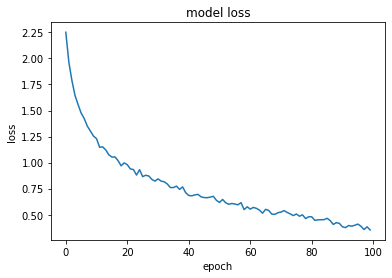

In [5]:
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

# Summarize history for loss
plt.plot(history.history['loss'])
plt.plot(loss)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()


Below is the confusion matrix of the model. The matrix compares how the test samples, grouped by its actual genre (rows), is predicted by the model (columns). Ideally, all samples should be at the diagonal of the matrix.

(10.0, 0.0)

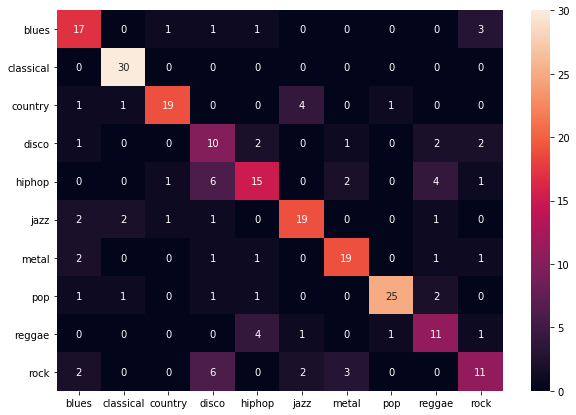

In [6]:
test_predictions = model.predict_classes(X_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(np.argmax(y_test, axis=1), test_predictions)
cm_labels = label_encoder.inverse_transform(np.arange(cm.shape[0]))
cm_df = pd.DataFrame(cm, index = cm_labels, columns = cm_labels)

plt.figure(figsize = (10,7))
ax = sn.heatmap(cm_df, annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

## Reference

[1] Pandey, P. (2018, December 19). Music Genre Classification with Python. Retrieved from https://towardsdatascience.com/music-genre-classification-with-python-c714d032f0d8.
[2] Thierry Bertin-Mahieux, Daniel P.W. Ellis, Brian Whitman, and Paul Lamere. The Million Song Dataset. In Proceedings of the 12th International Society for Music Information Retrieval Conference (ISMIR 2011), 2011.